4.Does mental health interfere with work? 


In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import os

import hvplot.pandas

In [2]:
# Define the path to the CSV file
file_path = Path('files/mental_heath_2016.csv')  # Replace 'your_file_name.csv' with the actual file name

# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Display the DataFrame
data_df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
# Create a list of selected column indices
selected_columns = [22, 23, 47, 48,53,54, 55, 56, 57, 58, 59, 60, 61]

# Use the selected columns to create a new DataFrame
Lishi_selected_data = data_df.copy().iloc[:, selected_columns]

Lishi_selected_data.head()
print(Lishi_selected_data.columns.tolist())  # This will print a list of the column names

['Do you believe your productivity is ever affected by a mental health issue?', 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?', 'Do you currently have a mental health disorder?', 'If yes, what condition(s) have you been diagnosed with?', 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?', 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?', 'What is your age?', 'What is your gender?', 'What country do you live in?', 'What US state or territory do you live in?', 'What country do you work in?', 'What US state or territory do you work in?', 'Which of the following best describes your work position?']


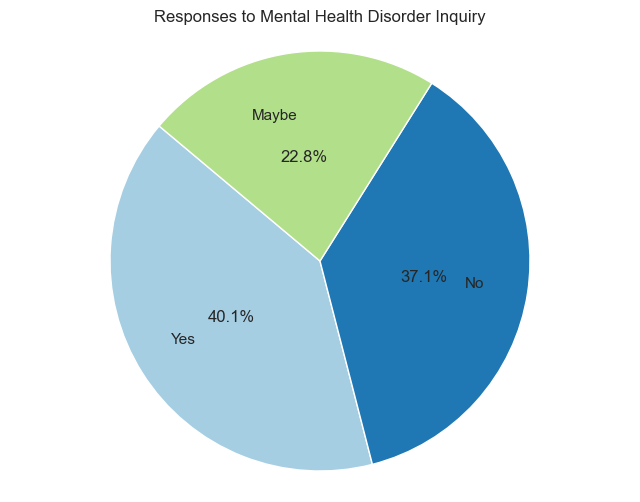

In [4]:
#select the 'Do you currently have a mental health disorder'
df = pd.DataFrame(Lishi_selected_data, columns=['Do you currently have a mental health disorder?'])
# Count occurrences of each response category
response_counts = df['Do you currently have a mental health disorder?'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie chart
fig1 = plt.pie(response_counts['Count'], 
        labels=response_counts['Response'],  
        autopct='%1.1f%%', 
        pctdistance=0.5,
        labeldistance=0.7,
        startangle=140, 
        colors=sns.color_palette('Paired', len(response_counts)))

# Add a title
plt.title('Responses to Mental Health Disorder Inquiry')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

plt.savefig("output/Lishi_f1_Responses to Mental Health Disorder Inquiry.png")
plt.show()

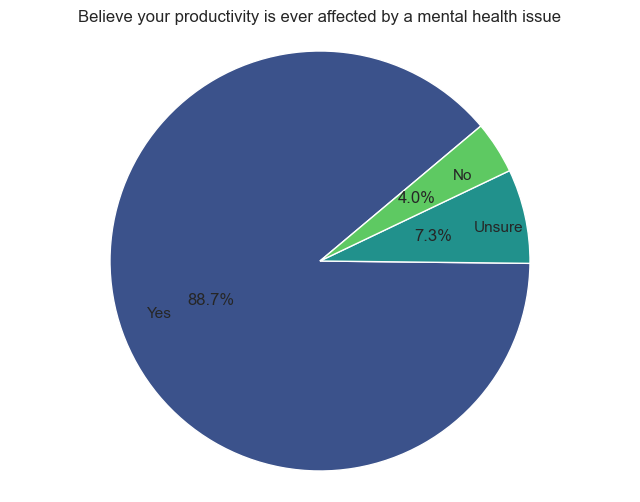

In [5]:
#select data with mental disorder and believe that work is interfere 
interfere_data = Lishi_selected_data[Lishi_selected_data['Do you currently have a mental health disorder?'] == 'Yes']
interfere_data_1 = pd.DataFrame(interfere_data, columns=['Do you believe your productivity is ever affected by a mental health issue?'])
# Count occurrences of each response category
response_counts = interfere_data_1['Do you believe your productivity is ever affected by a mental health issue?'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))


# Create a pie chart
fig2 = plt.pie(response_counts['Count'], 
        labels=response_counts['Response'], 
        autopct='%1.1f%%', 
        startangle=40, 
        pctdistance=0.55,
        labeldistance=0.75,
        colors=sns.color_palette('viridis', len(response_counts)))

# Add a title
plt.title('Believe your productivity is ever affected by a mental health issue')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

plt.savefig("output/Lishi_f2_believe your productivity is ever affected by a mental health issue.png")
plt.show()

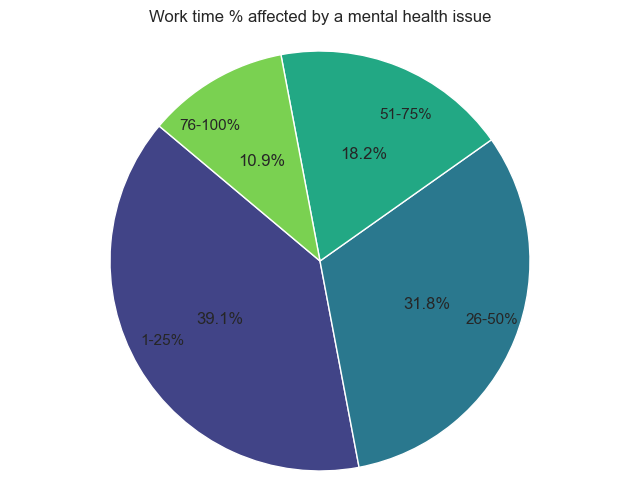

In [6]:
interfere_data = Lishi_selected_data[Lishi_selected_data['Do you currently have a mental health disorder?'] == 'Yes']
interfere_percentage_data = interfere_data[interfere_data['Do you believe your productivity is ever affected by a mental health issue?'] == 'Yes']
interfere_percentage_data = pd.DataFrame(interfere_percentage_data, columns=['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'])

# Count occurrences of each response category
response_counts = interfere_percentage_data['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie chart
fig3 = plt.pie(response_counts['Count'], 
        labels=response_counts['Response'], 
        autopct='%1.1f%%', 
        startangle=140, 
        pctdistance=0.55,
        labeldistance=0.75,
        colors=sns.color_palette('viridis', len(response_counts)))

# Add a title
plt.title('Work time % affected by a mental health issue')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.


plt.savefig("output/Lishi_f3_Work time % affected by a mental health issue.png")
plt.show()

Part 2: using API to analysis the metal health levels in different cities in USA

In [7]:
# filter the data in USA
Region_df = Lishi_selected_data[Lishi_selected_data['What country do you live in?'] == 'United States of America']
Region_df1 = Region_df.copy().rename(columns={
    'What US state or territory do you live in?': 'State/Territory',
    'Do you currently have a mental health disorder?': 'Mental Health Disorder'
})

# Count occurrences of each state/territory
state_counts = Region_df1['State/Territory'].value_counts().reset_index()
state_counts.columns = ['State/Territory', 'Count']

# Merge counts back to original DataFrame
Region_df1 = Region_df1.merge(state_counts, on='State/Territory')

# Sort the original DataFrame by Count
Region_df_sorted = Region_df1.sort_values(by='Count', ascending=False)

# Filter the DataFrame for counts greater than 20
Region_df_filtered = Region_df_sorted[Region_df_sorted['Count'] > 20]

# Display the sorted DataFrame
Region_df_filtered.head()

,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Mental Health Disorder,"If yes, what condition(s) have you been diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,State/Territory,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Count
461,NaN,NaN,Maybe,NaN,Rarely,Sometimes,32,female,United States of America,California,United States of America,California,Other,130
101,NaN,NaN,Yes,NaN,Not applicable to me,Not applicable to me,21,Male,United States of America,California,United States of America,California,Dev Evangelist/Advocate,130
745,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Sometimes,Often,24,Genderflux demi-girl,United States of America,California,United States of America,California,DevOps/SysAdmin|Support|Back-end Developer|Fro...,130
744,NaN,NaN,Maybe,NaN,Often,Often,25,male,United States of America,California,United States of America,California,Back-end Developer|DevOps/SysAdmin,130
246,NaN,NaN,No,NaN,Not applicable to me,Not applicable to me,27,male,United States of America,California,United States of America,California,Back-end Developer,130


In [8]:
# Count total responses for each State/Territory
total_counts = Region_df_filtered['State/Territory'].value_counts().reset_index()
total_counts.columns = ['State/Territory', 'Total Responses']

# Count occurrences of each response type for each region
response_counts = Region_df_filtered.groupby(['State/Territory', 'Mental Health Disorder']).size().unstack(fill_value=0)

# Combine total responses with response counts
# Resetting index to merge back with total counts
response_counts.reset_index(inplace=True)

# Merge total counts with response counts
final_counts = pd.merge(total_counts, response_counts, on='State/Territory', how='left')

# Calculate the percentage of "Yes" and "Maybe" responses
final_counts['Total with Disorder'] = final_counts.get('Yes', 0) + final_counts.get('Maybe', 0)
final_counts['Percentage with Disorder'] = (
    final_counts['Total with Disorder'] / final_counts['Total Responses'] * 100
)

# Display the final DataFrame with percentages
final_counts.head(50)  # A # Adjust to show more or fewer rows as needed
print(final_counts)

   State/Territory  Total Responses  Maybe  No  Yes  Total with Disorder  \
0       California              130     27  43   60                   87   
1         Illinois               56      8  18   30                   38   
2         Michigan               48     13  17   18                   31   
3         New York               45      9  13   23                   32   
4       Washington               43     12  12   19                   31   
5            Texas               43     13   8   22                   35   
6        Minnesota               42      7  15   20                   27   
7           Oregon               37      4  13   20                   24   
8     Pennsylvania               33      5   8   20                   25   
9         Colorado               28      8   7   13                   21   
10       Tennessee               27      5   9   13                   18   
11            Ohio               25      7   6   12                   19   
12         I

In [9]:
#weather api key
weather_api_key = "5b60fafe7144a49bd839ed0ebc4a69e9"

url = 'http://api.openweathermap.org/data/2.5/weather'

# Mapping states/territories to their major cities
state_to_city = {
    'California': 'Los Angeles',
    'Illinois': 'Chicago',
    'Michigan': 'Detroit',
    'New York': 'New York City',
    'Washington': 'Seattle',
    'Texas': 'Houston',
    'Minnesota': 'Minneapolis',
    'Oregon': 'Portland',
    'Pennsylvania': 'Philadelphia',
    'Colorado': 'Denver',
    'Tennessee': 'Nashville',
    'Ohio': 'Columbus',
    'Indiana': 'Indianapolis',
    'Massachusetts': 'Boston',
    'Florida': 'Miami',
    'North Carolina': 'Charlotte'
}

final_counts['City'] = final_counts['State/Territory'].map(state_to_city)
final_counts.head()

,State/Territory,Total Responses,Maybe,No,Yes,Total with Disorder,Percentage with Disorder,City
0,California,130,27,43,60,87,66.923077,Los Angeles
1,Illinois,56,8,18,30,38,67.857143,Chicago
2,Michigan,48,13,17,18,31,64.583333,Detroit
3,New York,45,9,13,23,32,71.111111,New York City
4,Washington,43,12,12,19,31,72.093023,Seattle


In [10]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our DataFrame to fetch weather data
for i, row in final_counts.iterrows():
    city = row['City']

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&units=imperial&q={city}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except Exception as e:
        print(f"Error retrieving data for {city}: {e}")

# Create a DataFrame from the city data
weather_df = pd.DataFrame(city_data)

# Convert both 'City' columns in final_counts and weather_df to string type, if necessary
final_counts['City'] = final_counts['City'].astype(str)
weather_df['City'] = weather_df['City'].astype(str)

# Merge the two DataFrames on the 'City' column
merged_df = pd.merge(final_counts, weather_df, on='City', how='left')

# Display the merged DataFrame
merged_df.head()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Los Angeles
Processing Record 2 of Set 1 | Chicago
Processing Record 3 of Set 1 | Detroit
Processing Record 4 of Set 1 | New York City
Processing Record 5 of Set 1 | Seattle
Processing Record 6 of Set 1 | Houston
Processing Record 7 of Set 1 | Minneapolis
Processing Record 8 of Set 1 | Portland
Processing Record 9 of Set 1 | Philadelphia
Processing Record 10 of Set 1 | Denver
Processing Record 11 of Set 1 | Nashville
Processing Record 12 of Set 1 | Columbus
Processing Record 13 of Set 1 | Indianapolis
Processing Record 14 of Set 1 | Boston
Processing Record 15 of Set 1 | Miami
Processing Record 16 of Set 1 | Charlotte


,State/Territory,Total Responses,Maybe,No,Yes,Total with Disorder,Percentage with Disorder,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,California,130,27,43,60,87,66.923077,Los Angeles,34.0522,-118.2437,74.16,54,94,1.74,US,1728297498
1,Illinois,56,8,18,30,38,67.857143,Chicago,41.8500,-87.6500,53.56,48,0,8.59,US,1728297393
2,Michigan,48,13,17,18,31,64.583333,Detroit,42.3314,-83.0458,53.28,54,1,8.61,US,1728297499
3,New York,45,9,13,23,32,71.111111,New York City,40.7143,-74.0060,63.32,85,98,9.93,US,1728297499
4,Washington,43,12,12,19,31,72.093023,Seattle,47.6062,-122.3321,51.82,82,23,1.12,US,1728297229


In [11]:
# Convert both 'City' columns in final_counts and weather_df to string type
final_counts['City'] = final_counts['City'].astype(str)
weather_df['City'] = weather_df['City'].astype(str)

# Merge the two DataFrames on the 'City' column
merged_df = pd.merge(final_counts, weather_df, on='City', how='left')

# Display the merged DataFrame
merged_df.head()

,State/Territory,Total Responses,Maybe,No,Yes,Total with Disorder,Percentage with Disorder,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,California,130,27,43,60,87,66.923077,Los Angeles,34.0522,-118.2437,74.16,54,94,1.74,US,1728297498
1,Illinois,56,8,18,30,38,67.857143,Chicago,41.8500,-87.6500,53.56,48,0,8.59,US,1728297393
2,Michigan,48,13,17,18,31,64.583333,Detroit,42.3314,-83.0458,53.28,54,1,8.61,US,1728297499
3,New York,45,9,13,23,32,71.111111,New York City,40.7143,-74.0060,63.32,85,98,9.93,US,1728297499
4,Washington,43,12,12,19,31,72.093023,Seattle,47.6062,-122.3321,51.82,82,23,1.12,US,1728297229


In [12]:
#plot Mental health levels of each city
map_plot = merged_df.hvplot.points(
    x='Lng',
    y='Lat',
    size=merged_df['Percentage with Disorder'] * 3,  # Size of points based on humidity
    color='City',  # Optional: color points based on humidity
    alpha=0.65,        # Transparency of points
    tiles='OSM',      # Use OpenStreetMap tiles for the background
    geo=True,          # Treat coordinates as geographic data
    title='Mental health of each city ',  # Title of the map
    frame_width=800,                        # Width of the plot
    frame_height=500 ,
    hover_cols=['City','Percentage with Disorder']
)

map_plot
#hv.save(map_plot, 'output/Lishi_f4_mental_health_of_each_city.png', fmt='png')
#export_png(map_plot, filename="output_data/Lishi_f4_mental_health_of_each_city.png")

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,_size,Percentage with Disorder)

In [13]:
#bar plot of Percentage with Disorder by City
merged_df_sorted = merged_df.sort_values(by='Percentage with Disorder', ascending=False)
# Create a bar plot of Percentage with Disorder by City
bar_plot = merged_df_sorted.hvplot.bar(
    x='City',
    y='Percentage with Disorder',
    title='Percentage with Disorder by City',
    xlabel='City',
    ylabel='Percentage with Disorder (%)',
    rot=45,  # Rotate the x-axis labels for better readability
    width=900,  # Width of the plot
    height=500,  # Height of the plot
    color ='Percentage with Disorder'  # Optional: Color by city for visual distinction
)

# Show the plot
bar_plot


:Bars   [City]   (Percentage with Disorder)